### About data:

price: price in US dollars (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Importing libraries

In [415]:
import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

## Data analysis & Visualization

In [323]:
diamonds = pd.read_csv("diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [324]:
diamonds.drop("Unnamed: 0", axis=1,inplace=True)

In [325]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [326]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We have three categorical features (cut, color, clarity):

In [327]:
print(diamonds["cut"].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [328]:
print(diamonds["color"].value_counts())

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


In [329]:
print(diamonds["clarity"].value_counts())

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


### we'll handle them later

In [330]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There is no missing values in our data 😀

In [331]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


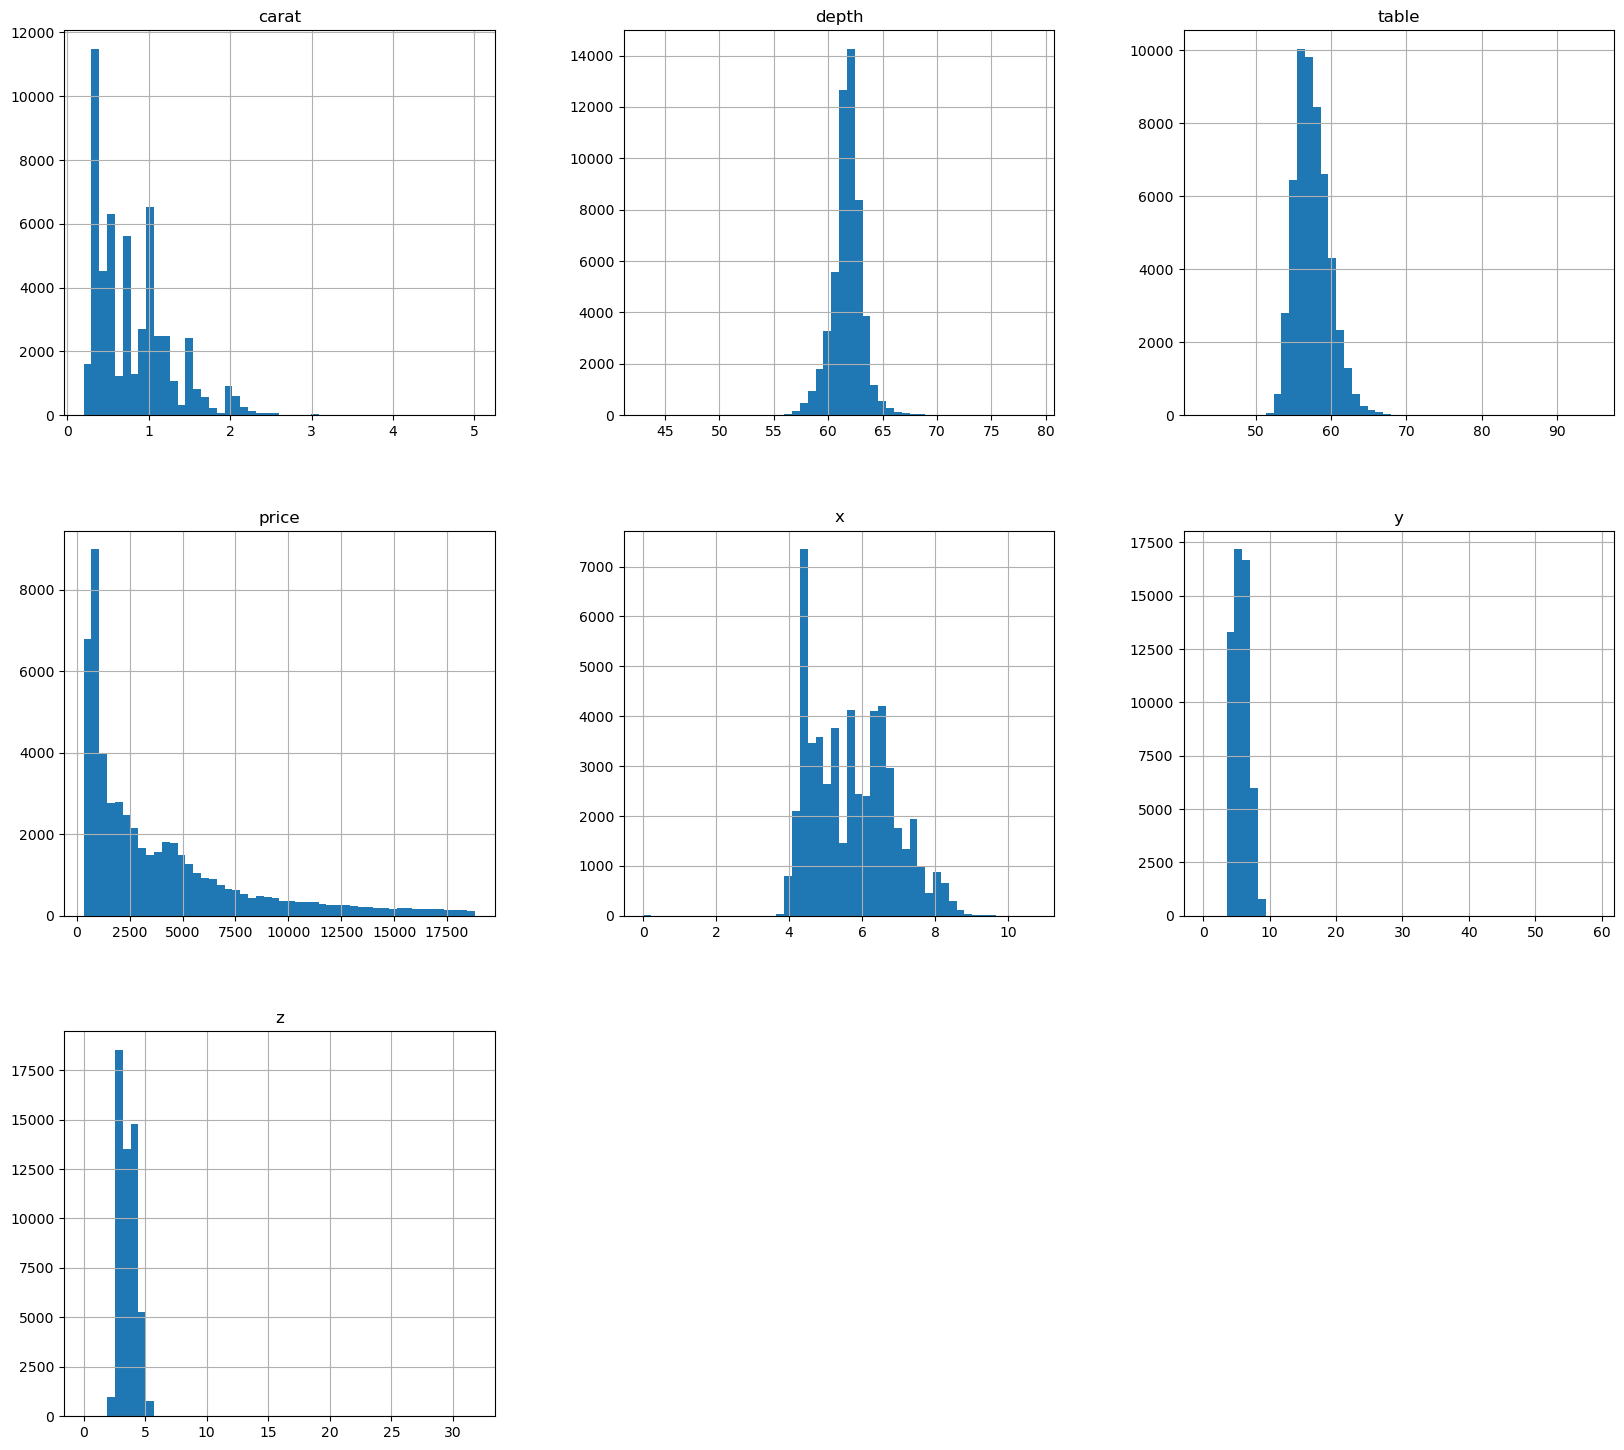

In [332]:
diamonds.hist(bins=50, figsize=(20,18))
plt.show()

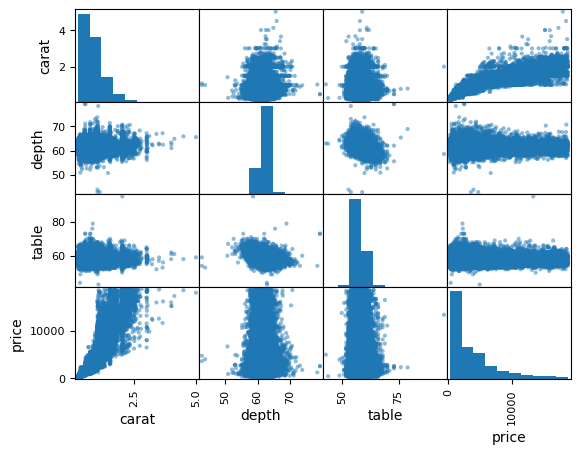

In [334]:
attr = ["carat", "depth", "table", "price"]
scatter_matrix(diamonds[attr])
plt.show()

In [335]:
correlations = diamonds.corr()
correlations

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [336]:
price_corr = correlations["price"].sort_values(ascending=False)
pd.DataFrame(price_corr)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


<AxesSubplot:>

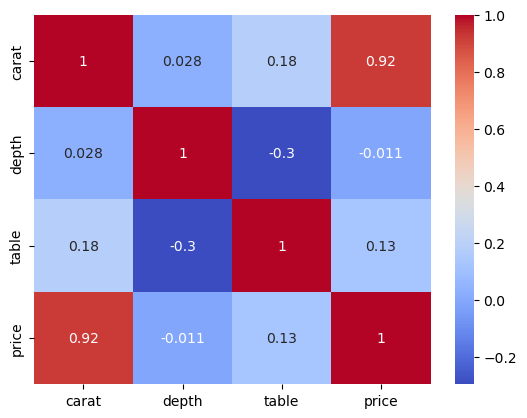

In [337]:
sns.heatmap(diamonds[attr].corr(), cmap="coolwarm", annot=True)

<AxesSubplot:>

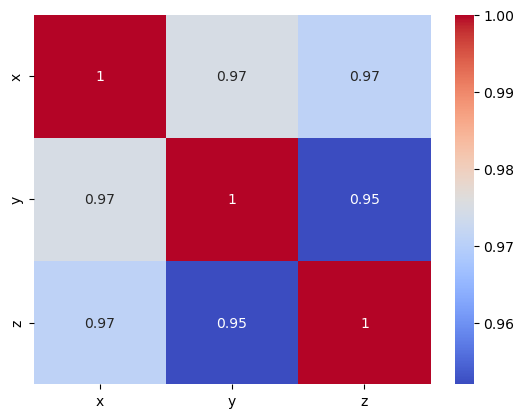

In [338]:
sns.heatmap(diamonds[["x","y","z"]].corr(), cmap="coolwarm", annot=True)

## Since the dimensions **(x,y,z)** of the diamond have a strong positive **correlation** between each other and with the price we should **extract** some useful features from them then **drop** them.

## Feature engineering (preprocessing)

In [345]:
diamonds["vol"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

In [346]:
correlations = diamonds.corr()
price_corr = correlations["price"].sort_values(ascending=False)
pd.DataFrame(price_corr)

,price
price,1.000000
carat,0.921591
vol,0.902385
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


In [347]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [348]:
diamonds["density"] = diamonds["carat"] / diamonds["vol"]

In [349]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol,density
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.006021
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.006086
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.006040
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.006207
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.005971


In [350]:
correlations = diamonds.corr()
price_corr = correlations["price"].sort_values(ascending=False)
pd.DataFrame(price_corr)

,price
price,1.000000
carat,0.921591
vol,0.902385
x,0.884435
y,0.865421
z,0.861249
density,0.143440
table,0.127134
depth,-0.010647


In [351]:
diamonds["mean_xyz"] = (diamonds["x"] + diamonds["y"] + diamonds["z"]) / 3

In [352]:
diamonds["symmetry"] = (abs(diamonds["x"]-diamonds["mean_xyz"])+abs(diamonds["y"]-diamonds["mean_xyz"])+abs(diamonds["z"]-diamonds["mean_xyz"])) / 3

In [353]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol,density,mean_xyz,symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.006021,3.453333,0.682222
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.006086,3.346667,0.691111
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.006040,3.476667,0.777778
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.006207,3.686667,0.704444
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.005971,3.813333,0.708889


In [354]:
correlations = diamonds.corr()
price_corr = correlations["price"].sort_values(ascending=False)
pd.DataFrame(price_corr)

,price
price,1.000000
carat,0.921591
vol,0.902385
x,0.884435
mean_xyz,0.881078
y,0.865421
z,0.861249
symmetry,0.742533
density,0.143440
table,0.127134


<AxesSubplot:>

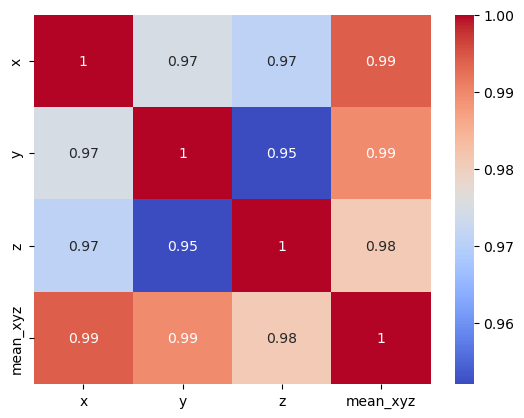

In [355]:
sns.heatmap(diamonds[["x","y","z", "mean_xyz"]].corr(), cmap="coolwarm", annot=True)

# Handling categorical features

In [357]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     53940 non-null  float64
 1   cut       53940 non-null  object 
 2   color     53940 non-null  object 
 3   clarity   53940 non-null  object 
 4   depth     53940 non-null  float64
 5   table     53940 non-null  float64
 6   price     53940 non-null  int64  
 7   x         53940 non-null  float64
 8   y         53940 non-null  float64
 9   z         53940 non-null  float64
 10  vol       53940 non-null  float64
 11  density   53940 non-null  float64
 12  mean_xyz  53940 non-null  float64
 13  symmetry  53940 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 5.8+ MB


we will handle these three categorical features: clarity, cut, color

In [358]:
#first let's take a look at their values

In [359]:
diamonds["color"].unique()
# (best) D E F G H I J (worst)  

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [360]:
diamonds["clarity"].unique()
#I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [361]:
diamonds["cut"].unique()
# Fair, Good, Very Good, Premium, Ideal

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [362]:
colors_ordered = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_cat = diamonds[["color"]]
encoder = OrdinalEncoder(categories=[colors_ordered, ])
color_encoded = encoder.fit_transform(color_cat)

In [363]:
clarity_ordered = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_cat = diamonds[["clarity"]]
encoder = OrdinalEncoder(categories=[clarity_ordered ])
clarity_encoded = encoder.fit_transform(clarity_cat)

In [364]:
cut_ordered = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
cut_cat = diamonds[["cut"]]
encoder = OrdinalEncoder(categories=[cut_ordered ])
cut_encoded = encoder.fit_transform(cut_cat)

In [365]:
diamonds.corr()['price'].sort_values(ascending=False)

price       1.000000
carat       0.921591
vol         0.902385
x           0.884435
mean_xyz    0.881078
y           0.865421
z           0.861249
symmetry    0.742533
density     0.143440
table       0.127134
depth      -0.010647
Name: price, dtype: float64

In [366]:
diamonds.drop(['x', 'y', 'z', 'density', 'color', 'cut', 'clarity'], axis=1, inplace=True)

In [367]:
color_df = pd.DataFrame(color_encoded, columns=['color'])
clarity_df = pd.DataFrame(clarity_encoded, columns=['clarity'])
cut_df = pd.DataFrame(cut_encoded, columns=['cut'])

In [368]:
diamonds_encoded = pd.concat([diamonds, color_df, clarity_df, cut_df], axis=1)

# Splitting and scaling

In [369]:
# Hold_out split
x = diamonds_encoded.drop("price", axis=1)
y = diamonds_encoded["price"]
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [370]:
#scaling our features
scaler= StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Forward feature selection

In [391]:
from sklearn.feature_selection import SequentialFeatureSelector
feature_names = np.array(x.columns)
sfs_forward= SequentialFeatureSelector(LinearRegression(),
                                       n_features_to_select=6,
                                        direction="forward",
                                        scoring="r2"
                                      ).fit(x_train_scaled, y_train)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)

Features selected by forward sequential selection: ['carat' 'mean_xyz' 'symmetry' 'color' 'clarity' 'cut']


# Model building

In [396]:
#Prepare the data after feature selection
features_selected = feature_names[sfs_forward.get_support()]
x = x[features_selected]
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.3, random_state=40)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [416]:
# Apply Linear Regression on the selected features
reg = LinearRegression().fit(x_train_scaled, y_train)
y_pred_test = reg.predict(x_test_scaled)
y_pred_train = reg.predict(x_train_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Train score (r2): {reg.score(x_train_scaled, y_train)}')
print(f'Test score (r2): {reg.score(x_test_scaled, y_test)}')

print(f'MSE on train: {mse_train}')
print(f'MSE on test: {mse_test}')


print(f'The percentage of error (better interpreting of MSE) on train: {math.floor((mse_train/y_train.mean()**2) * 100)}%')
print(f'The percentage of error (better interpreting of MSE) on test: {math.floor((mse_test/y_test.mean()**2) * 100)}%')

Train score (r2): 0.9068049028810912
Test score (r2): 0.9055211055349583
MSE on train: 1480134.7479006578
MSE on test: 1510987.377653924
The percentage of error (better interpreting of MSE) on train: 9%
The percentage of error (better interpreting of MSE) on test: 9%
